In [1]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [6]:
path = "/media/NGS/Sequences/Neisseria_meningitidis/NCBI_complete/"

In [10]:
def run(args):
    fasta, file = args
    id = re.sub(r".fna$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [11]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [12]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_000152165.1,2242947,2242947,2242947,2242947,1
1,GCA_003355215.1,2314390,2314390,2314390,2314390,1
2,GCA_001697425.1,2173513,2173513,2173513,2173513,1
3,GCA_002073595.2,2273276,2273276,2273276,2273276,1
4,GCA_001697325.1,2173879,2173879,2173879,2173879,1
5,GCA_002951575.1,2203850,2203850,2203850,2203850,1
6,GCA_001697585.1,2175362,2175362,2175362,2175362,1
7,GCA_001697765.1,2173745,2173745,2173745,2173745,1
8,GCA_001697805.1,2168308,2168308,2168308,2168308,1
9,GCA_001697605.1,2172426,2172426,2172426,2172426,1


# N25, N50, N75

Text(0.5,1,'cumulative Vibrio cholerae contigs N25, N50, N75')

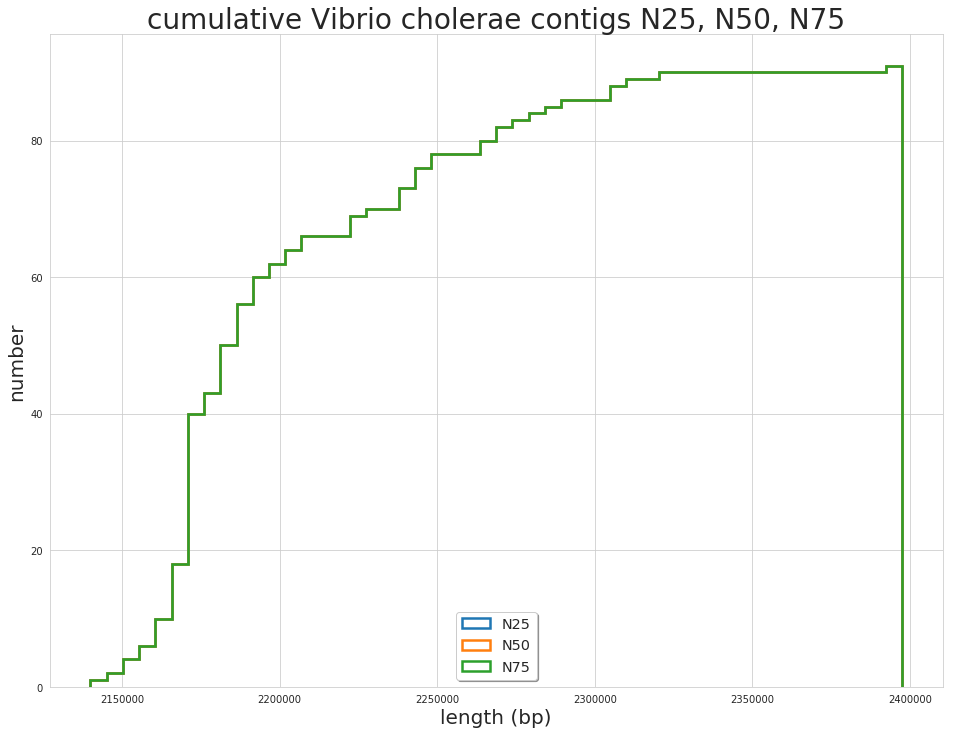

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Vibrio cholerae contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality.png")

Text(0,0.5,'number')

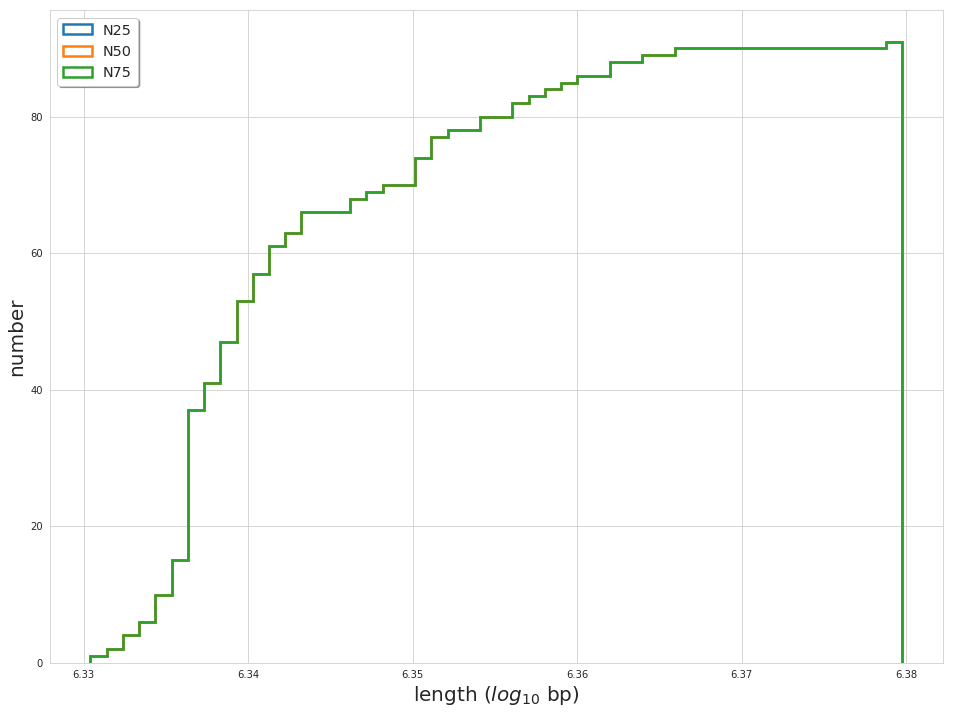

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
# plt.title("cumulative Vibrio cholerae contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality log-scale.png")

# Counts

Text(0.5,1,'Genome contig number distribution')

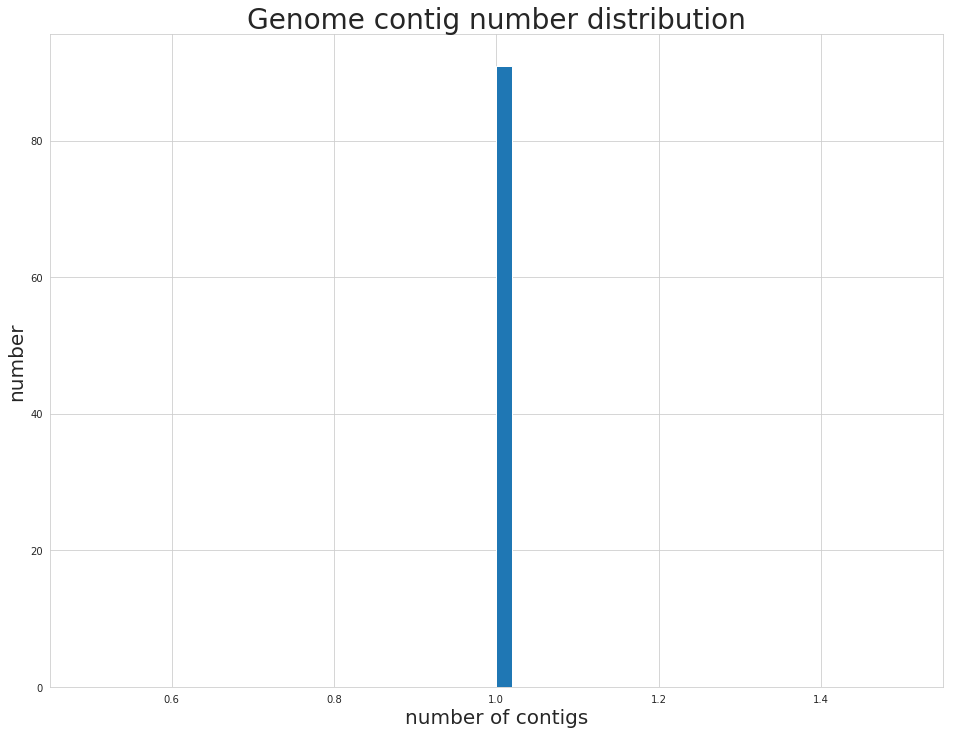

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution.png")

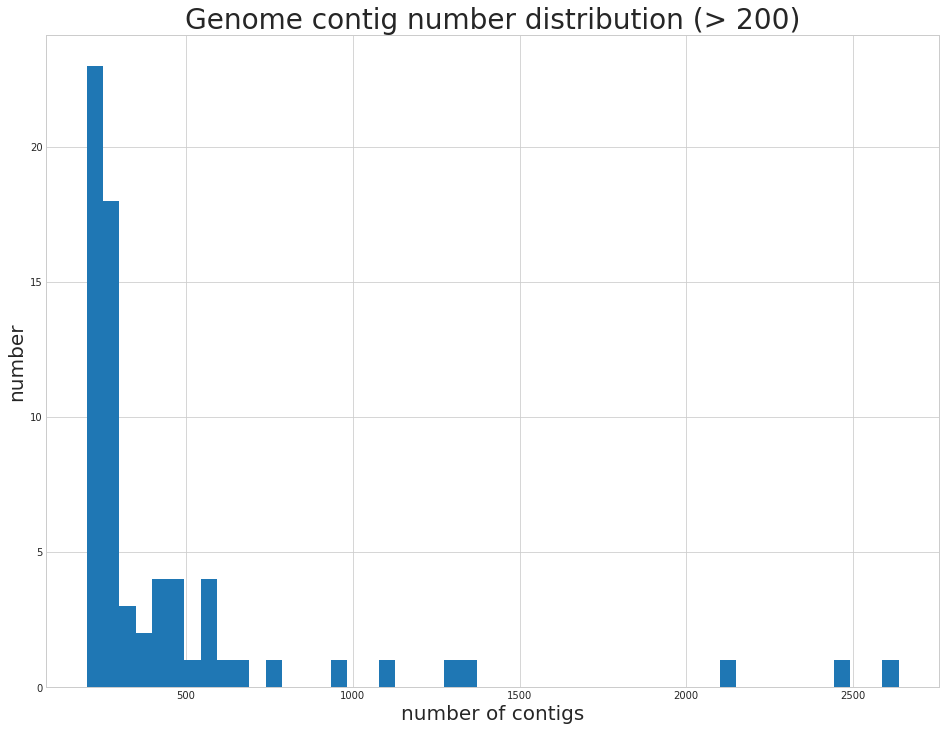

In [9]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 200)", fontsize=28)
plt.savefig("pics/Vibrio cholerae genome contig number distribution larger 200.png")

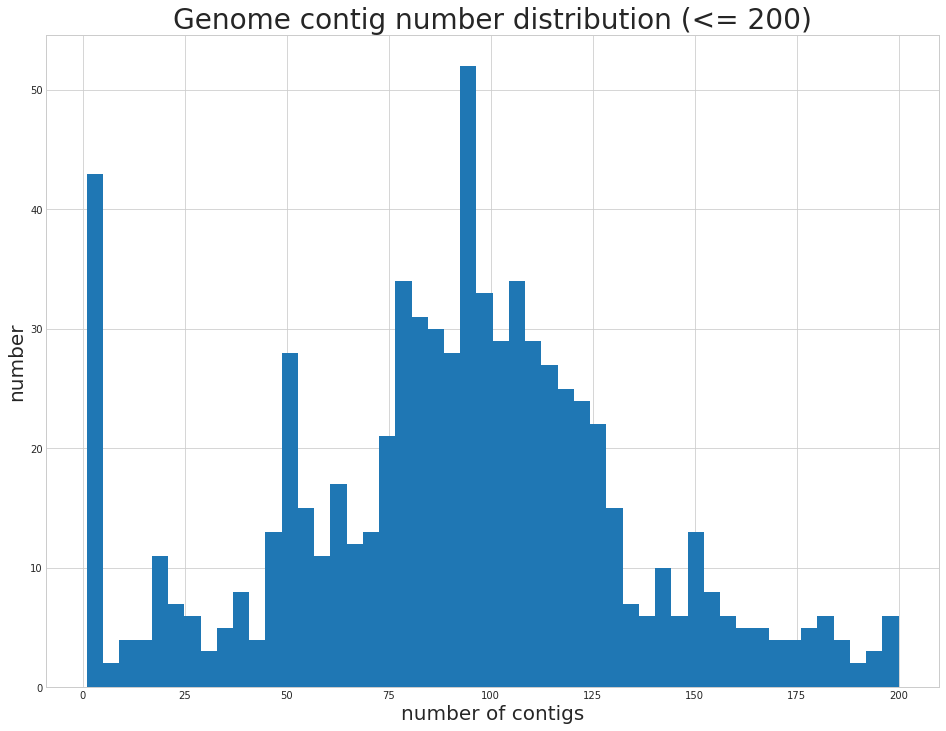

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 200)", fontsize=28)
plt.savefig("pics/Vibrio cholerae genome contig number distribution lower 200.png")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


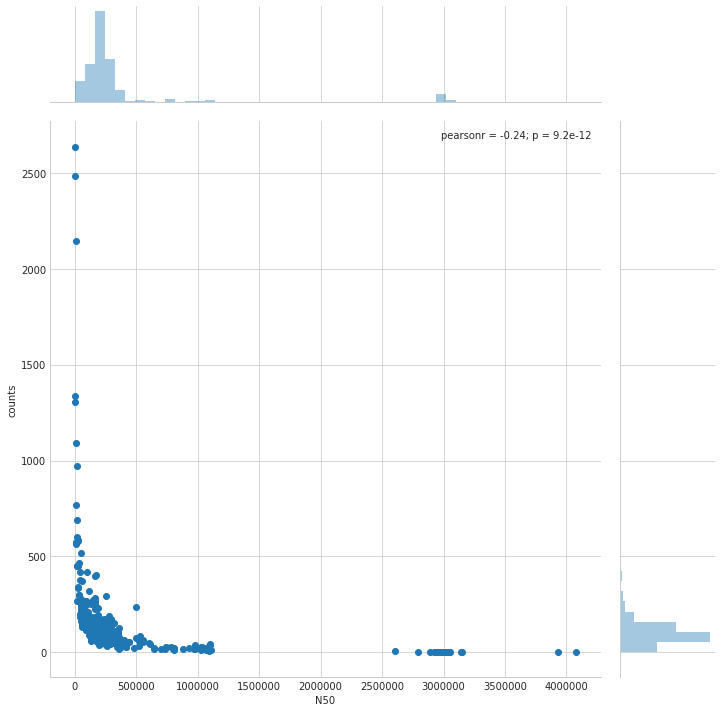

In [11]:
sns.jointplot(data=table, x="N50", y="counts", size=10)
# plt.savefig("pics/Salmonella enterica N50-count plot.png")

In [12]:
table["1/N50"] = 1/table["N50"]
table["1000/N50"] = table["1/N50"]*1000

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


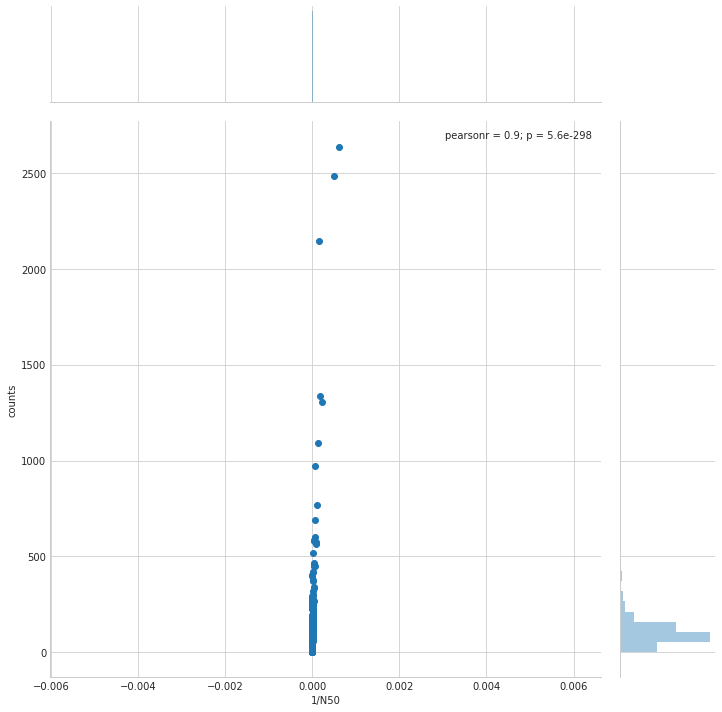

In [13]:
sns.jointplot(data=table, x="1/N50", y="counts", size=10)

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


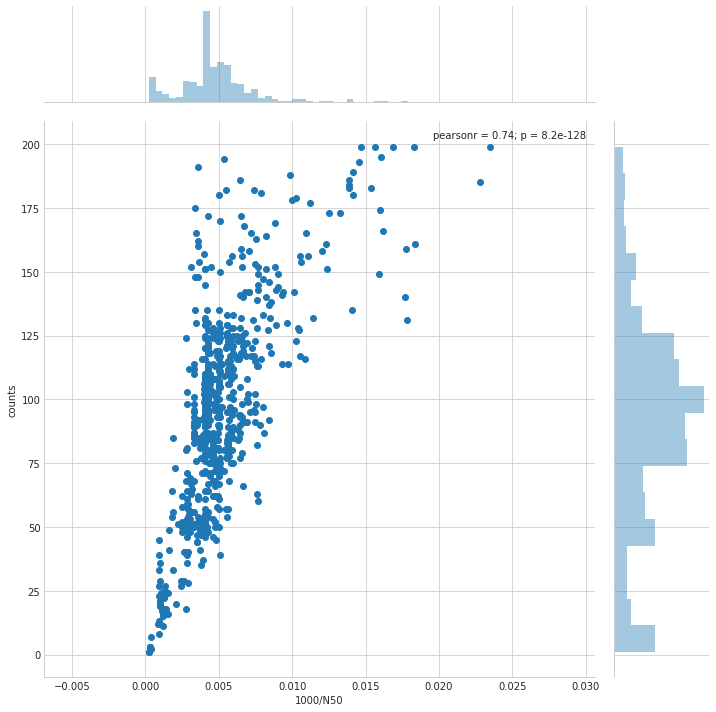

In [14]:
sns.jointplot(data=table[table["counts"] < 200], x="1000/N50", y="counts", size=10)

# comparison with serotypes

In [28]:
curated = table

In [29]:
curated

,id,N25,N50,N75,total_length,counts
0,GCA_000152165.1,2242947,2242947,2242947,2242947,1
1,GCA_003355215.1,2314390,2314390,2314390,2314390,1
2,GCA_001697425.1,2173513,2173513,2173513,2173513,1
3,GCA_002073595.2,2273276,2273276,2273276,2273276,1
4,GCA_001697325.1,2173879,2173879,2173879,2173879,1
5,GCA_002951575.1,2203850,2203850,2203850,2203850,1
6,GCA_001697585.1,2175362,2175362,2175362,2175362,1
7,GCA_001697765.1,2173745,2173745,2173745,2173745,1
8,GCA_001697805.1,2168308,2168308,2168308,2168308,1
9,GCA_001697605.1,2172426,2172426,2172426,2172426,1


# rule out plasmid only and contaminated

In [17]:
curated.index = [x[0:15] for x in curated["id"]]

# Combine metadata selection

In [22]:
metafile = "/media/NGS/Sequences/Neisseria_meningitidis/METADATA.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
meta

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Neisseria meningitidis MC58,MC58,19400,SAMN02603997,PRJNA251,Proteobacteria,Betaproteobacteria,GCA_000008805.1,2.27236,51.5,chromosome:NC_003112.2/AE002098.2,-,1,2104,1943,2000/02/25,2016/08/03,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Neisseria meningitidis Z2491,Z2491,19400,SAMEA1705949,PRJNA252,Proteobacteria,Betaproteobacteria,GCA_000009105.1,2.18441,51.8,chromosome:NC_003116.1/AL157959.1,-,1,2513,2186,2001/09/27,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Neisseria meningitidis FAM18,FAM18,19400,SAMEA1705939,PRJNA255,Proteobacteria,Betaproteobacteria,GCA_000009465.1,2.19496,51.6,chromosome:NC_008767.1/AM421808.1,-,1,2537,2202,2007/01/04,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Neisseria meningitidis 053442,053442,19400,SAMN02603605,PRJNA16393,Proteobacteria,Betaproteobacteria,GCA_000014105.1,2.15342,51.7,chromosome:NC_010120.1/CP000381.1,-,1,2487,2114,2007/12/03,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Neisseria meningitidis 8013,8013,19400,SAMEA2272745,PRJEA34687,Proteobacteria,Betaproteobacteria,GCA_000026965.1,2.27755,51.4,chromosome:NC_017501.1/FM999788.1,-,1,2605,2226,2009/10/15,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
5,Neisseria meningitidis alpha14,alpha14,19400,SAMEA3138289,PRJNA39689,Proteobacteria,Betaproteobacteria,GCA_000083565.1,2.14529,51.9,chromosome:NC_013016.1/AM889136.1,-,1,2469,2108,2009/07/23,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
6,Neisseria meningitidis alpha710,alpha710,19400,SAMN02603384,PRJNA36319,Proteobacteria,Betaproteobacteria,GCA_000152165.1,2.24295,51.7,chromosome:NC_017505.1/CP001561.1,-,1,2570,2210,2010/10/13,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
7,Neisseria meningitidis G2136,G2136,19400,SAMN02604201,PRJNA61085,Proteobacteria,Betaproteobacteria,GCA_000191425.1,2.18486,51.7,chromosome:NC_017513.1/CP002419.1,-,1,2510,2150,2011/03/04,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
8,Neisseria meningitidis H44/76,H44/76,19400,SAMN02604200,PRJNA61079,Proteobacteria,Betaproteobacteria,GCA_000191445.1,2.24088,51.4,chromosome:NC_017516.1/CP002420.1,-,1,2555,2246,2011/03/04,2017/03/15,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
9,Neisseria meningitidis M01-240149,M01-240149,19400,SAMN02604198,PRJNA61069,Proteobacteria,Betaproteobacteria,GCA_000191465.1,2.22352,51.4,chromosome:NC_017514.1/CP002421.1,-,1,2577,2220,2011/03/04,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [30]:
curated = pd.merge(curated, meta, left_index=True, left_on='id', right_on="Assembly")

In [31]:
curated

,id,N25,N50,N75,total_length,counts,#Organism/Name,Strain,CladeID,BioSample,...,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
6,GCA_000152165.1,2242947,2242947,2242947,2242947,1,Neisseria meningitidis alpha710,alpha710,19400,SAMN02603384,...,chromosome:NC_017505.1/CP001561.1,-,1,2570,2210,2010/10/13,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1404,GCA_003355215.1,2314390,2314390,2314390,2314390,1,Neisseria meningitidis,M22293,19400,SAMN09704693,...,chromosome:NZ_CP031334.1/CP031334.1,-,1,2729,2288,2018/08/05,2018/08/08,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003...
34,GCA_001697425.1,2173513,2173513,2173513,2173513,1,Neisseria meningitidis,M07149,19400,SAMN04883361,...,chromosome:NZ_CP016650.1/CP016650.1,-,1,2520,2177,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
630,GCA_002073595.2,2273276,2273276,2273276,2273276,1,Neisseria meningitidis,FDAARGOS_210,19400,SAMN04875547,...,chromosome:NZ_CP020421.2/CP020421.2,-,1,2668,2282,2017/03/29,2018/03/07,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...
29,GCA_001697325.1,2173879,2173879,2173879,2173879,1,Neisseria meningitidis,M12752,19400,SAMN04883372,...,chromosome:NZ_CP016645.1/CP016645.1,-,1,2516,2179,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
633,GCA_002951575.1,2203850,2203850,2203850,2203850,1,Neisseria meningitidis,M21273,19400,SAMN06144986,...,chromosome:NZ_CP018907.1/CP018907.1,-,1,2613,2252,2018/02/01,2018/03/04,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...
42,GCA_001697585.1,2175362,2175362,2175362,2175362,1,Neisseria meningitidis,M24730,19400,SAMN04883405,...,chromosome:NZ_CP016658.1/CP016658.1,-,1,2514,2178,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
51,GCA_001697765.1,2173745,2173745,2173745,2173745,1,Neisseria meningitidis,M27559,19400,SAMN04883452,...,chromosome:NZ_CP016667.1/CP016667.1,-,1,2510,2171,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
53,GCA_001697805.1,2168308,2168308,2168308,2168308,1,Neisseria meningitidis,M22759,19400,SAMN04883382,...,chromosome:NZ_CP016669.1/CP016669.1,-,1,2499,2162,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...
43,GCA_001697605.1,2172426,2172426,2172426,2172426,1,Neisseria meningitidis,M22801,19400,SAMN04883389,...,chromosome:NZ_CP016659.1/CP016659.1,-,1,2512,2174,2016/08/02,2017/03/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...


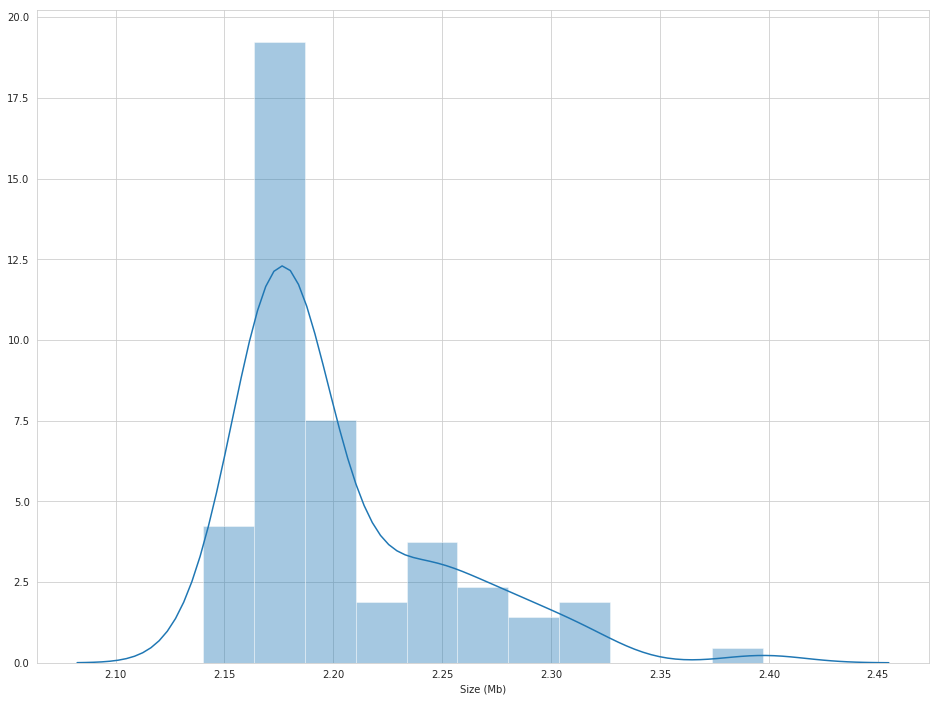

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)
# fig.savefig("pics/Vibrio cholerae genome size distribution.png")

/home/chen1i6c04/.local/share/virtualenvs/notebook-au3UQeJO/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


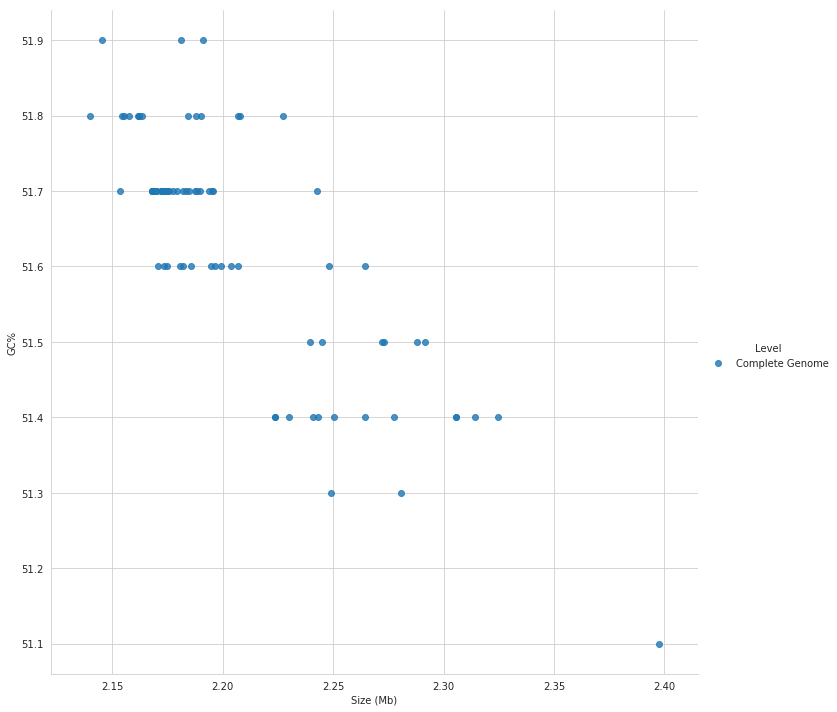

In [33]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="Level", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

/home/chen1i6c04/.local/share/virtualenvs/notebook-au3UQeJO/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


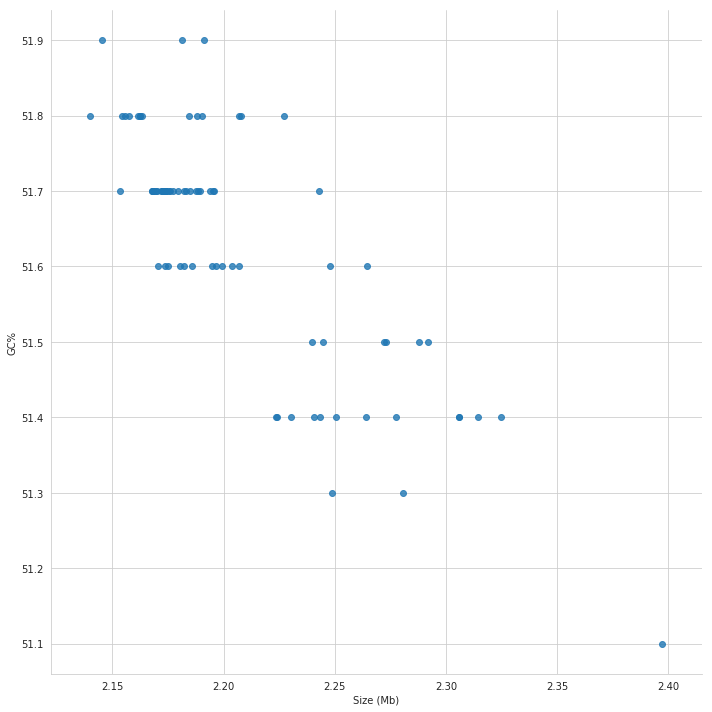

In [34]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

In [39]:
model = linear_model.HuberRegressor(epsilon=2)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

HuberRegressor(alpha=0.0001, epsilon=2, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [40]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

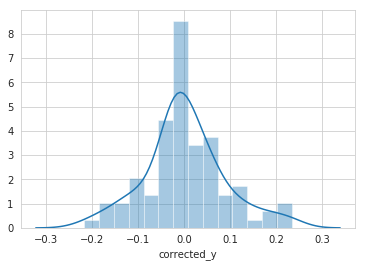

In [41]:
sns.distplot(curated["corrected_y"])

/home/chen1i6c04/.local/share/virtualenvs/notebook-au3UQeJO/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


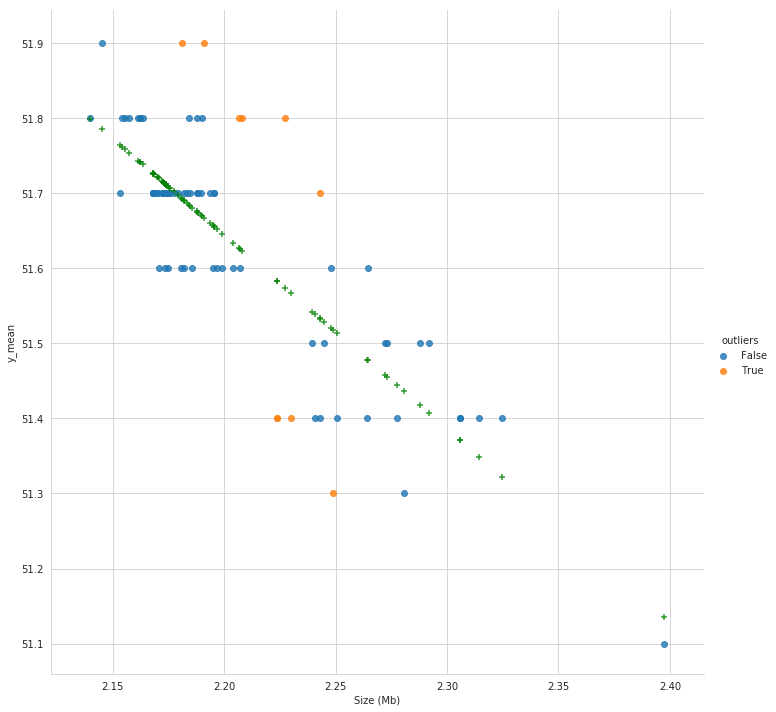

In [42]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot outliers.png")

In [29]:
curated = curated[~curated['outliers']]

In [30]:
curated.to_csv("results/Vibrio_cholerae_data_clean.tsv", sep="\t", index=False)

# selection of clean dataset

In [31]:
dst = "/media/NGS/Sequences/Vibrio_cholerae/NCBI_clean"
for file in curated["id"]:
    shutil.copyfile(os.path.join(path, file), os.path.join(dst, file))